In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
#raw_data is going to show the values
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
print(raw_data)

[[-0.11252183 -2.8272038  -3.7738969  ...  0.92528624  0.19313742
   1.        ]
 [-1.1008778  -3.9968398  -4.2858426  ...  1.1196209  -1.4362499
   1.        ]
 [-0.56708802 -2.5934502  -3.8742297  ...  0.90422673 -0.42179659
   1.        ]
 ...
 [-1.1229693  -2.2529248  -2.8676281  ... -2.0083694  -1.8083338
   0.        ]
 [-0.54770461 -1.8895451  -2.8397786  ...  1.1504486   0.80493225
   0.        ]
 [-1.3517791  -2.2090058  -2.5202247  ... -1.577823   -0.68453092
   0.        ]]


In [5]:
# The last element contains the labels
labels = raw_data[:, -1]
print(f"{labels} : labels")
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]
print(data)
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

[1. 1. 1. ... 0. 0. 0.] : labels
[[-0.11252183 -2.8272038  -3.7738969  ...  0.12343082  0.92528624
   0.19313742]
 [-1.1008778  -3.9968398  -4.2858426  ...  0.77381971  1.1196209
  -1.4362499 ]
 [-0.56708802 -2.5934502  -3.8742297  ...  0.32109663  0.90422673
  -0.42179659]
 ...
 [-1.1229693  -2.2529248  -2.8676281  ... -2.874136   -2.0083694
  -1.8083338 ]
 [-0.54770461 -1.8895451  -2.8397786  ...  1.261335    1.1504486
   0.80493225]
 [-1.3517791  -2.2090058  -2.5202247  ... -2.2600228  -1.577823
  -0.68453092]]


# Normalize the data to [0,1].


# helps the neural network or other machine learning models train faster and more effectively

In [9]:
#calculate the minimun value accross all elements
min_val = tf.reduce_min(train_data)
#just to test
print(min_val)
# calculate the maximum value accross all elements
max_val = tf.reduce_max(train_data)
print(max_val)

train_data = (train_data - min_val) / (max_val - min_val) #This formula normalizes the data by transforming all values into the range [0, 1].
#min_val: This is subtracted from each element to shift the minimum value of the data to 0
test_data = (test_data - min_val) / (max_val - min_val)
#max_val - min_val: Divides the result to scale the data, ensuring the largest value is 1 after scaling.
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
#y casting the data explicitly, you ensure that it is in the correct format for TensorFlow operations and computations, 
# which helps avoid potential data type mismatches later in the workflow.

tf.Tensor(0.0, shape=(), dtype=float32) är min
tf.Tensor(1.0, shape=(), dtype=float32)


In [11]:
# since in labels I only have 1 and 0 I can have it as boolean where 1 is True (normal data) and 0 is false (anomaly data)
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
#train_data[train_labels]: This selects all data points from train_data where 
# the corresponding label in train_labels is True, meaning this extracts the "normal" data points (it filters the true and falses)
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

#here ectractin anomaly from train_data and test_data
anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]


# plot a NORMAL ECG

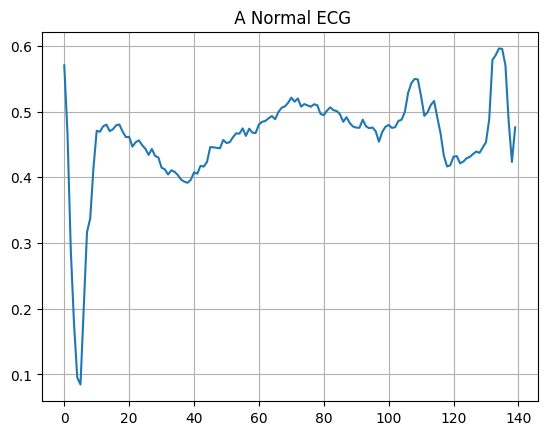

In [17]:
#first draw a free grid
plt.grid()
plt.plot(np.arange(140),normal_train_data[0])
plt.title(" A Normal ECG")
plt.show()